#IMPORT THE REQUIRED LIBRARIES

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy import *
from scipy import stats
from statsmodels.stats.diagnostic import *
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15) 

#LOAD THE DATA

* Create a dataframe using the csv file.
*Here, parse_dates=[0] because the first column is date, we want the dataframe to read the column as datatype 'date'.

In [ ]:
df = pd.read_csv('ULTRACEMCO.NS.csv',parse_dates=[0])

Display few rows of the data

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,4368.000000,4410.000000,4155.0,4212.600098,4199.360352,362440.0
1,2019-10-03,4219.000000,4219.000000,4114.0,4146.799805,4133.767090,321369.0
2,2019-10-04,4173.200195,4183.299805,3967.0,3979.550049,3967.042725,476329.0
3,2019-10-07,3999.000000,4008.800049,3853.0,3870.399902,3858.235596,413509.0
4,2019-10-09,3868.000000,4061.000000,3868.0,4043.550049,4030.841553,802345.0


We have 7 columns and 248 rows.

In [ ]:
df.shape

(248, 7)

We are interested in only 2 columns[Date, Adj Close], we will extract these columns.

In [ ]:
df = df[['Date','Adj Close']]

Type of the columns

In [ ]:
df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

Check for the null values

In [ ]:
df.isnull().sum()

Date         0
Adj Close    1
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,Date,Adj Close
16,2019-10-27,NaN


There is one null value, for now, we will delete that row.

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

Date         0
Adj Close    0
dtype: int64

Number of rows after removing the null values

In [ ]:
df.shape

(247, 2)

#Calculate the simple returns and log returns of the daily stock prices

In [ ]:
import numpy as np
df['simple_return'] = np.nan

In [ ]:
for i in range(len(df['Adj Close'])-1):
  df.simple_return.iloc[i+1] = ((df['Adj Close'].iloc[i+1]/df['Adj Close'].iloc[i])-1)*100

In [ ]:
df.head()

,Date,Adj Close,simple_return,log_return
0,2019-10-01,4199.360352,NaN,NaN
1,2019-10-03,4133.767090,-1.561982,-0.015743
2,2019-10-04,3967.042725,-4.033231,-0.041168
3,2019-10-07,3858.235596,-2.742777,-0.027811
4,2019-10-09,4030.841553,4.473702,0.043765


In [ ]:
df.tail()

,Date,Adj Close,simple_return,log_return
242,2020-09-23,3869.149902,-0.360532,-0.003612
243,2020-09-24,3777.800049,-2.360980,-0.023893
244,2020-09-25,3858.500000,2.136163,0.021137
245,2020-09-28,3922.000000,1.645717,0.016323
246,2020-09-29,4062.100098,3.572160,0.035098


In [ ]:
df['log_return'] = np.nan

In [ ]:
import math,numpy
for i in range(len(df['Adj Close'])-1):
  df.log_return.iloc[i+1] = math.log(df['Adj Close'].iloc[i+1]/df['Adj Close'].iloc[i])

In [ ]:
df

,Date,Adj Close,simple_return,log_return
0,2019-10-01,4199.360352,NaN,NaN
1,2019-10-03,4133.767090,-1.561982,-0.015743
2,2019-10-04,3967.042725,-4.033231,-0.041168
3,2019-10-07,3858.235596,-2.742777,-0.027811
4,2019-10-09,4030.841553,4.473702,0.043765
...,...,...,...,...
242,2020-09-23,3869.149902,-0.360532,-0.003612
243,2020-09-24,3777.800049,-2.360980,-0.023893
244,2020-09-25,3858.500000,2.136163,0.021137
245,2020-09-28,3922.000000,1.645717,0.016323


#SUMMARY STATISTICS OF THE DATA

In [ ]:
df.describe()

,Adj Close,simple_return,log_return
count,247.000000,246.000000,246.000000
mean,3949.255639,0.016719,-0.000135
std,353.241746,2.454773,0.024697
min,3008.614502,-14.522155,-0.156913
25%,3788.480713,-1.016232,-0.010214
50%,4004.250000,-0.057827,-0.000578
75%,4177.594726,1.190736,0.011837
max,4662.250977,12.880402,0.121159


In [ ]:
skewness_kurtosis = pd.concat([pd.Series(df.skew().values),pd.Series(df.kurtosis().values)],1)
skewness_kurtosis.columns = ['Skewness','Kurtosis']
skewness_kurtosis.index = df.skew().index

In [ ]:
skewness_kurtosis

,Skewness,Kurtosis
Adj Close,-0.570128,-0.068119
simple_return,-0.254471,8.515679
log_return,-0.646713,9.429893


In [ ]:
def time_series_plot(data,x_column,y_column):
  fig, ax = plt.subplots(figsize=(10,5))
  #Calculate and plot the trend line
  x = np.arange(data.shape[0])
  fit = np.polyfit(x, data[y_column], 1)
  fit_fn = np.poly1d(fit)
  plt.plot(data[x_column], fit_fn(x), linestyle='--')
  #plot the actual data
  plt.plot(data[x_column], data[y_column])
  ax.set_title('Ultratech cement limited \n'+y_column+' prices'+' (Oct 1,2019 to Sept 30,2020)\n',fontsize=15)
  plt.xlabel(x_column,fontsize=13)
  plt.ylabel(y_column+' prices',fontsize=13)
  ax.tick_params(axis='both', which='major', labelsize=13)

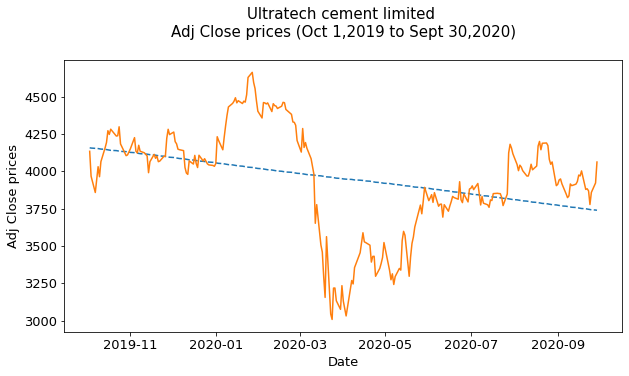

In [ ]:
new_df = df.dropna()
time_series_plot(new_df,'Date','Adj Close')

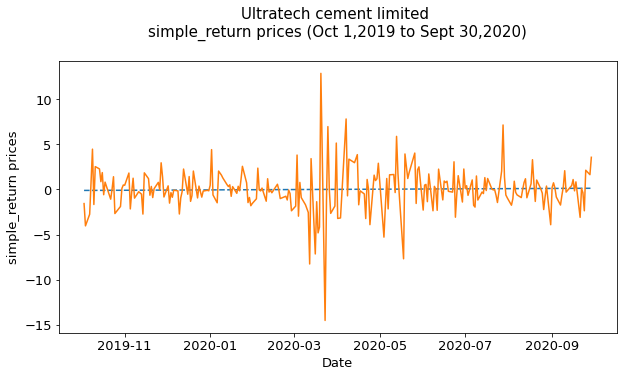

In [ ]:
time_series_plot(new_df,'Date','simple_return')

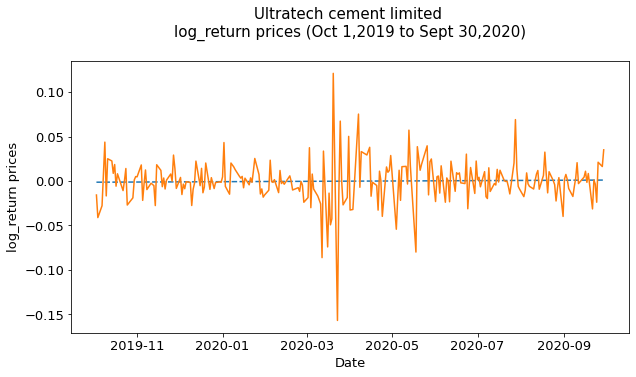

In [ ]:
time_series_plot(new_df,'Date','log_return')

In [ ]:
def frequency_plot(data,column):
  fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 7))
  fig.suptitle('Frequency plot of Daily '+column+' Prices (Using different bins)', fontsize=15)
  sns.histplot(data[column],element='poly',fill=False,bins=int(round(1+(np.log2(data.shape[0])))),ax=ax1)
  ax1.set_title('Bins = '+str(int(round(1+(np.log2(data.shape[0])))))+' (Used Sturge\'s formula)',fontsize=13)
  sns.histplot(data[column],element='poly',fill=False,bins=20,ax=ax2)
  ax2.set_title('Bins=20',fontsize=13)
  sns.histplot(data[column],element='poly',fill=False,bins=35,ax=ax3)
  ax3.set_title('Bins=35',fontsize=13)
  sns.histplot(data[column],element='poly',fill=False,bins=50,ax=ax4)
  ax4.set_title('Bins=50',fontsize=13)
  plt.subplots_adjust(wspace=0.5)
  plt.subplots_adjust(hspace=0.5)

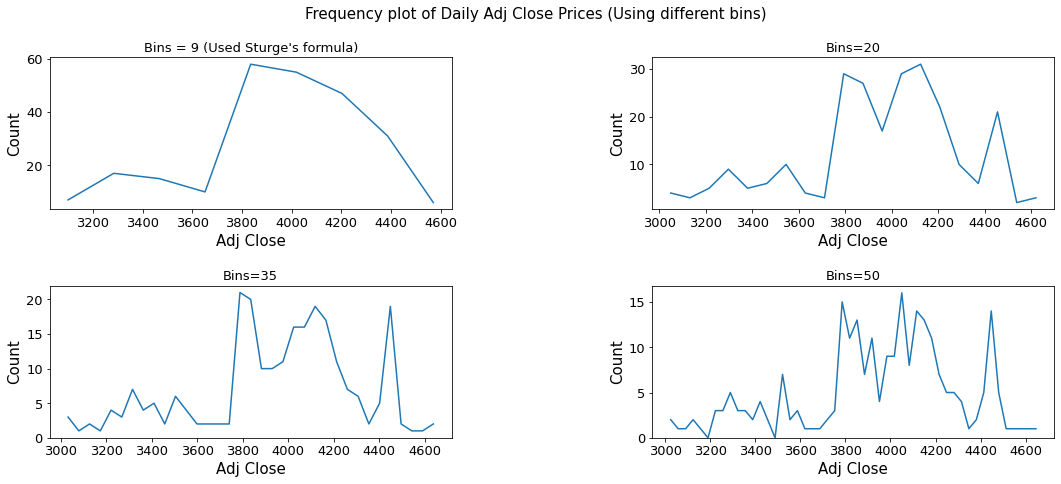

In [ ]:
frequency_plot(new_df,'Adj Close')

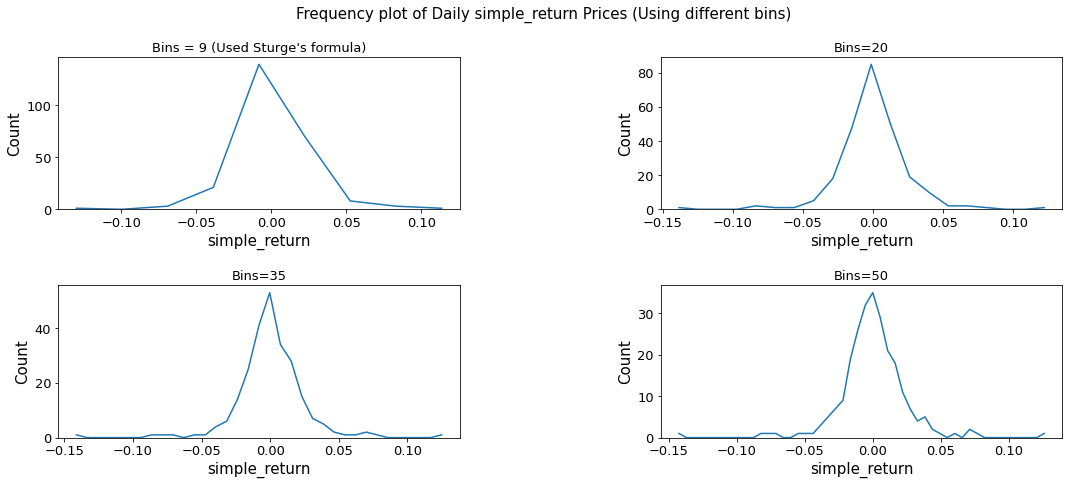

In [ ]:
frequency_plot(new_df,'simple_return')

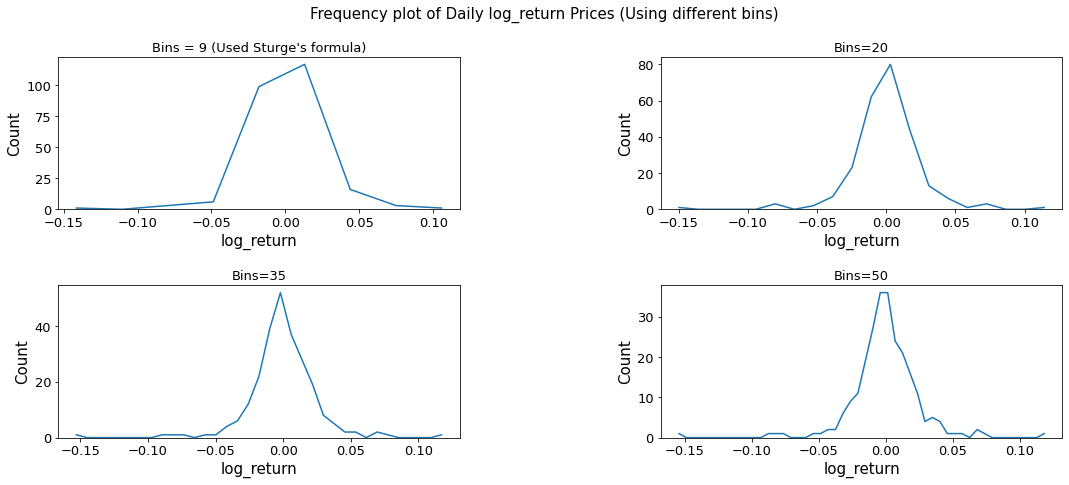

In [ ]:
frequency_plot(new_df,'log_return')

#TEST FOR NORMALITY : USING GRAPHS

In [ ]:
def plot_for_normality(column):
  fig, (ax1, ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 7))
  sns.distplot(x = df[column],ax=ax1,bins=int(round(1+(np.log2(df.shape[0]))))) # for number of bins used the Sturges' rule
  sm.ProbPlot(df[column].dropna()).qqplot(line='s',ax=ax2) #the default is 'norm'
  sns.boxplot(df[column],ax=ax3)
  ax1.set_title('Density plot and histogram of column '+column,fontsize=15)
  ax1.set_xlabel(column)
  ax2.set_title('Q-Q plot of column '+column,fontsize=15)
  ax3.set_title('Box plot of column '+column,fontsize=15)
  plt.subplots_adjust(wspace=0.5)
  plt.tight_layout()
  print('Skewness : ',df[column].skew())
  print('Kurtosis : ',df[column].kurtosis())

Skewness :  -0.5701283349544228
Kurtosis :  -0.06811853766815101


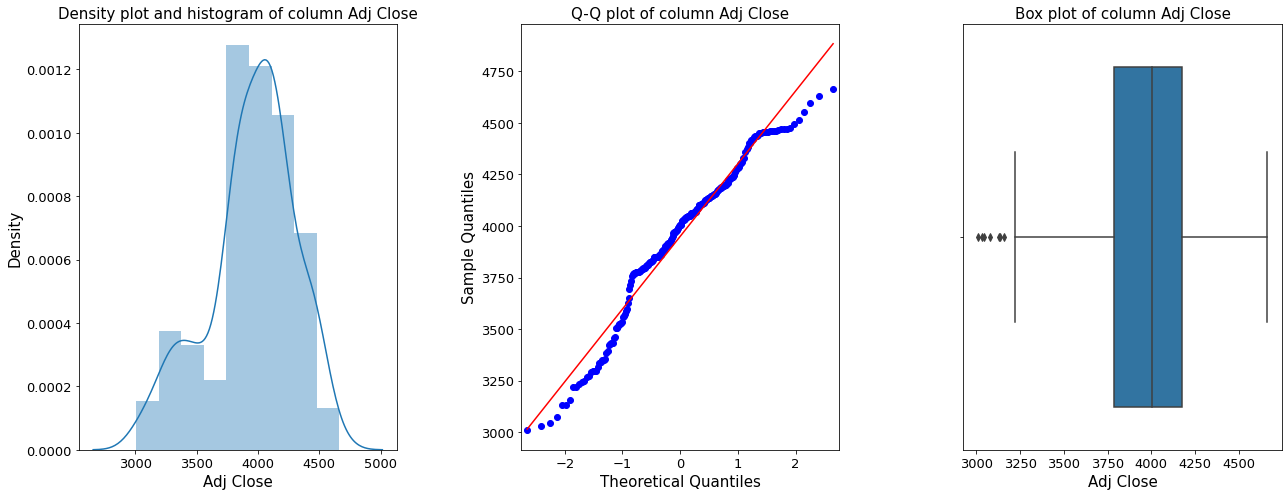

In [ ]:
plot_for_normality('Adj Close')

* We get a negative skewed value, which is not very far away from 0. Data is moderately skewed.
* Kurtosis is less than 3, so this is Platykurtic distribution(lighter tails than a normal distribution)
* In the first plot, the curve shows the density plot which is essentially a smooth version of the histogram. The curve doesn't really look like a bell curve.
* In the second graph, we can say that many observations are deviating from the straight line.The points form a curve rather than a straight line, which usually is an indication of skewness in the data.
* In the third graph, outliers are clearly visible. The median cuts the box into two unequal pieces,the longer part is to the left or below the median,hence, the data is skewed left.

Skewness :  -0.25447137727537267
Kurtosis :  8.515679283842937


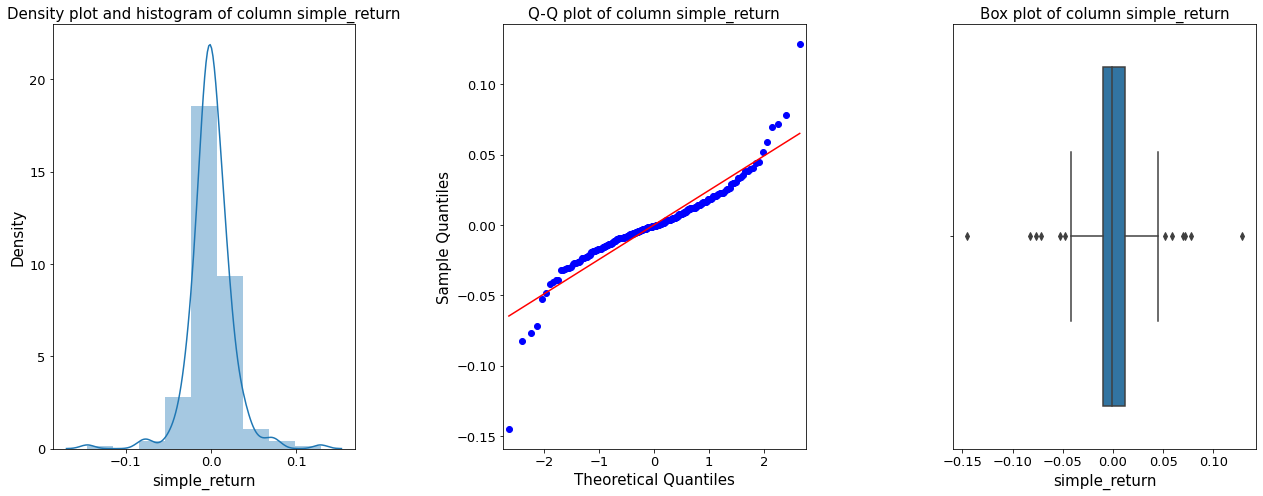

In [ ]:
plot_for_normality('simple_return')

* Data is moderately skewed, we get a negative skewed value which is not very far away from 0.
* Kurtosis is greater than 3, so this is Leptokurtic distribution(heavier tails than a normal distribution).
* In the first graph, the peak of the curve is high. More of the data is concentrated towards the mean.
* In the second graph, the points form a curve that deviates markedly from a straight line. Possible outliers are points at the ends of the line, distanced from the bulk of the observations.
* In the third graph, outliers are clearly visible on the both sides. Also, few of them are very extreme.

Skewness :  -0.6467128261272341
Kurtosis :  9.42989287261117


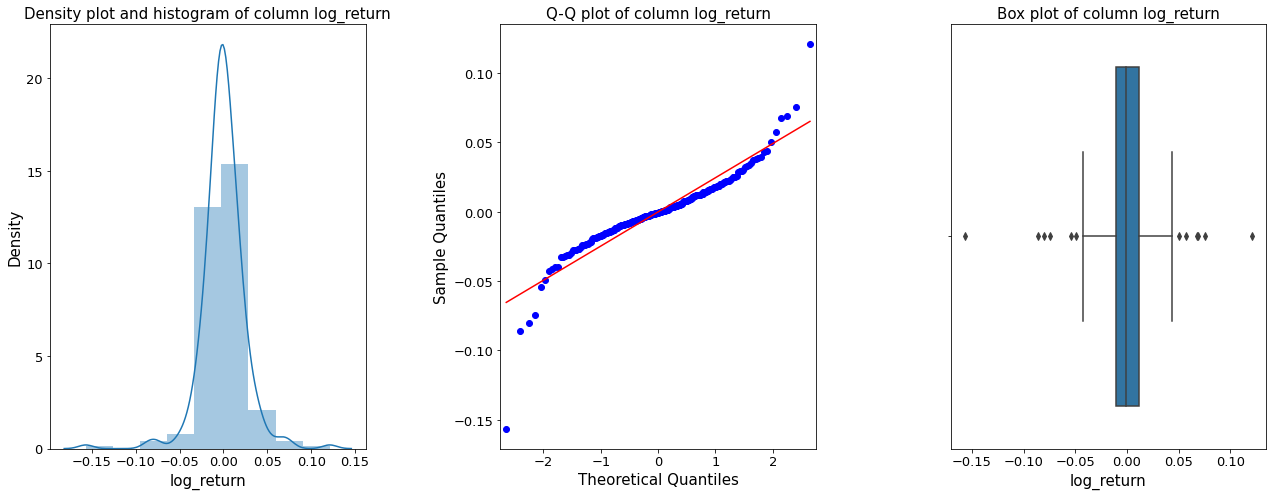

In [ ]:
plot_for_normality('log_return')

* The data has negative skewed value. Kurtosis is greater than 3, so this is Leptokurtic distribution(heavier tails than a normal distribution).
* In the first graph, the peak of the curve is high. More of the data is concentrated towards the mean.
* In the second graph, the points form a curve that deviates markedly from a straight line. Possible outliers are points at the ends of the line, distanced from the bulk of the observations.
* In the third graph, outliers are clearly visible on the both sides. Also, few of them are very extreme.

#TEST FOR NORMALITY : USING STATISTICAL TESTS

Null hypothesis (H_0): The data is normally distributed.

Alternate hypothesis (H_1): The data is not normally distributed.

* Jarque-Bera Test
* Shapiro-Wilk Test
* Kolmogorov-Smirnov Goodness of Fit
* Lilliefors Test

In [ ]:
def tests_for_normality(column):
  print('--Normality tests for the data in the column '+column+'--\n')
  print('----Jarque-Bera Test------')
  t_statistic, p = stats.jarque_bera(df[column].dropna())
  print('Test-statistic : ',t_statistic,'\np-value : ',p)
  if (p < 0.05):
    print('Reject the null hypothesis.')
  else:
    print('Do not reject the null hypothesis')
  print('\n----Shapiro-Wilk Test------')
  t_statistic, p = stats.shapiro(df[column].dropna())
  print('Test-statistic : ',t_statistic,'\np-value : ',p)
  if (p < 0.05):
    print('Reject the null hypothesis.')
  else:
    print('Do not reject the null hypothesis')
  print('\n----Kolmogorov-Smirnov Goodness of Fit------')
  t_statistic, p = stats.kstest(df[column].dropna(),'norm')
  print('Test-statistic : ',t_statistic,'\np-value : ',p)
  if (p < 0.05):
    print('Reject the null hypothesis.')
  else:
    print('Do not reject the null hypothesis')
  print('\n----Lilliefors Test------')
  t_statistic, p = lilliefors(df[column].dropna())
  print('Test-statistic : ',t_statistic,'\np-value : ',p)
  if (p < 0.05):
    print('Reject the null hypothesis.')
  else:
    print('Do not reject the null hypothesis')
  

In [ ]:
tests_for_normality('Adj Close')

--Normality tests for the data in the column Adj Close--

----Jarque-Bera Test------
Test-statistic :  13.30388524293268 
p-value :  0.00129151075044176
Reject the null hypothesis.

----Shapiro-Wilk Test------
Test-statistic :  0.9628831148147583 
p-value :  5.190190222492674e-06
Reject the null hypothesis.

----Kolmogorov-Smirnov Goodness of Fit------
Test-statistic :  1.0 
p-value :  0.0
Reject the null hypothesis.

----Lilliefors Test------
Test-statistic :  0.09984840195904779 
p-value :  3.0051799820451355e-06
Reject the null hypothesis.


We reject the null hypothesis.
Thus, we have sufficient evidence to say that the data in the column 'Adj Close' has skewness and kurtosis that is significantly different from a normal distribution.

In [ ]:
tests_for_normality('simple_return')

--Normality tests for the data in the column simple_return--

----Jarque-Bera Test------
Test-statistic :  712.0306543766475 
p-value :  0.0
Reject the null hypothesis.

----Shapiro-Wilk Test------
Test-statistic :  0.8914567828178406 
p-value :  2.7014738102765223e-12
Reject the null hypothesis.

----Kolmogorov-Smirnov Goodness of Fit------
Test-statistic :  0.4647633392450605 
p-value :  3.4112218659096916e-49
Reject the null hypothesis.

----Lilliefors Test------
Test-statistic :  0.09271120547527775 
p-value :  2.4939661362494747e-05
Reject the null hypothesis.


We reject the null hypothesis.
Thus, we have sufficient evidence to say that the data in the column 'Simple return' has skewness and kurtosis that is significantly different from a normal distribution.

In [ ]:
tests_for_normality('log_return')

--Normality tests for the data in the column log_return--

----Jarque-Bera Test------
Test-statistic :  887.3348387513382 
p-value :  0.0
Reject the null hypothesis.

----Shapiro-Wilk Test------
Test-statistic :  0.8848373293876648 
p-value :  1.0166122501112373e-12
Reject the null hypothesis.

----Kolmogorov-Smirnov Goodness of Fit------
Test-statistic :  0.46592010129989614 
p-value :  1.8870022740268145e-49
Reject the null hypothesis.

----Lilliefors Test------
Test-statistic :  0.09574798316815436 
p-value :  1.0624886914303124e-05
Reject the null hypothesis.


We reject the null hypothesis.
Thus, we have sufficient evidence to say that the data in the column 'Log return' has skewness and kurtosis that is significantly different from a normal distribution.

From all the above visulizations and the tests done on the data, we can conclude that the data is not normally distributed.